## Explorative Data Analysis of cement strength data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# import data
df = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\cement_strength_reg\\Data\\Concrete Compressive Strength.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age_day,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age_day                        1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age_day                          0
Concrete compressive strength    0
dtype: int64

In [10]:
df.duplicated().sum()

25

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
# unique values in each column

for i in df.columns:
    print(i, df[i].nunique())

Cement 280
Blast Furnace Slag  187
Fly Ash 163
Water 205
Superplasticizer 155
Coarse Aggregate 284
Fine Aggregate 304
Age_day 14
Concrete compressive strength 938


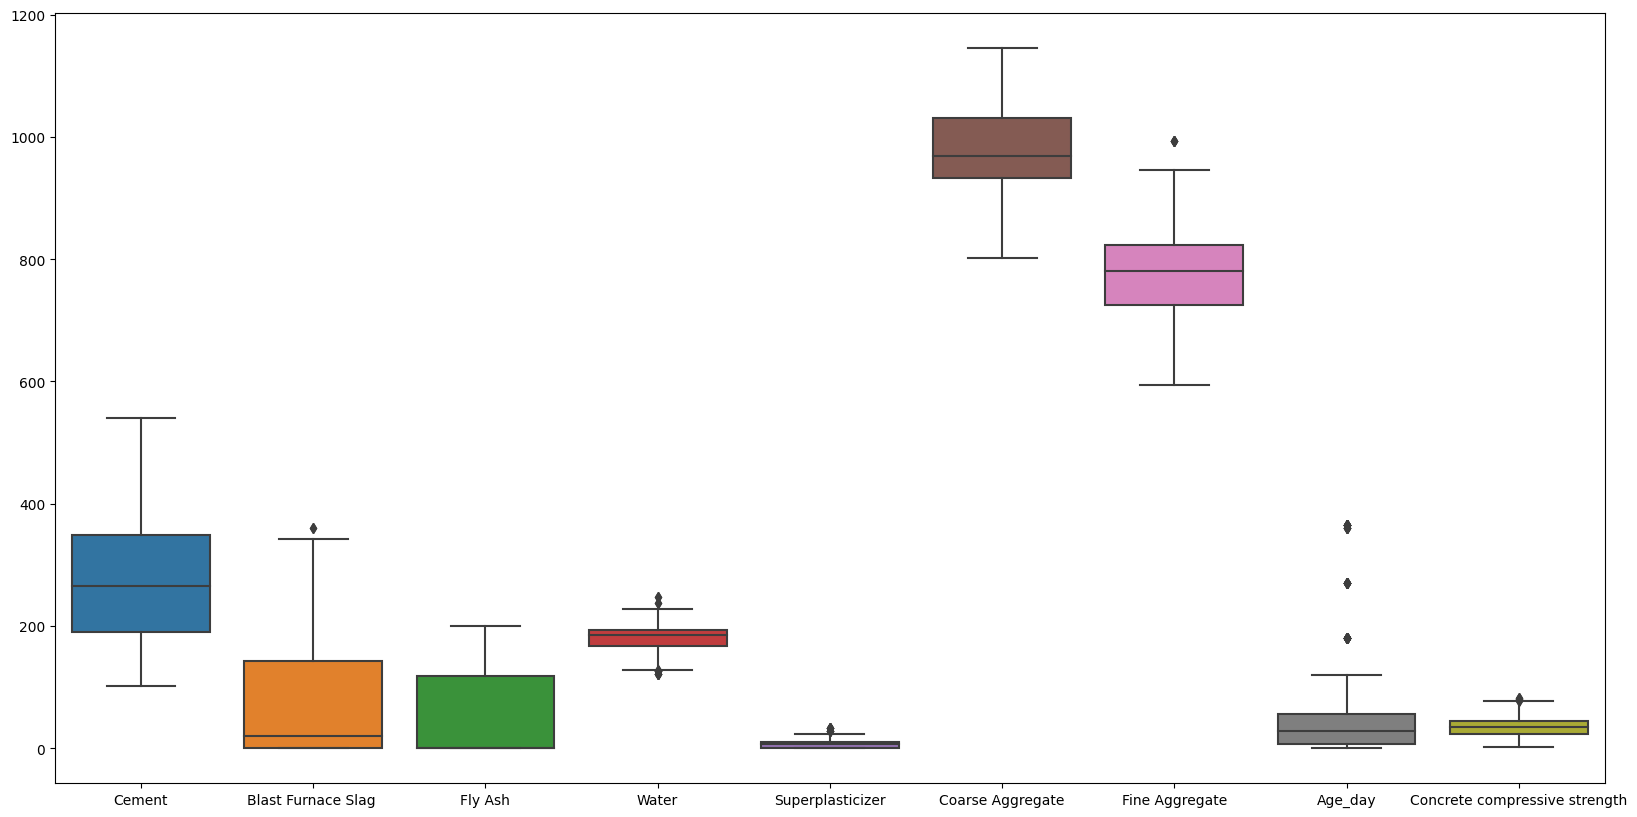

In [15]:
# cheek for outliers in one frame

plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()


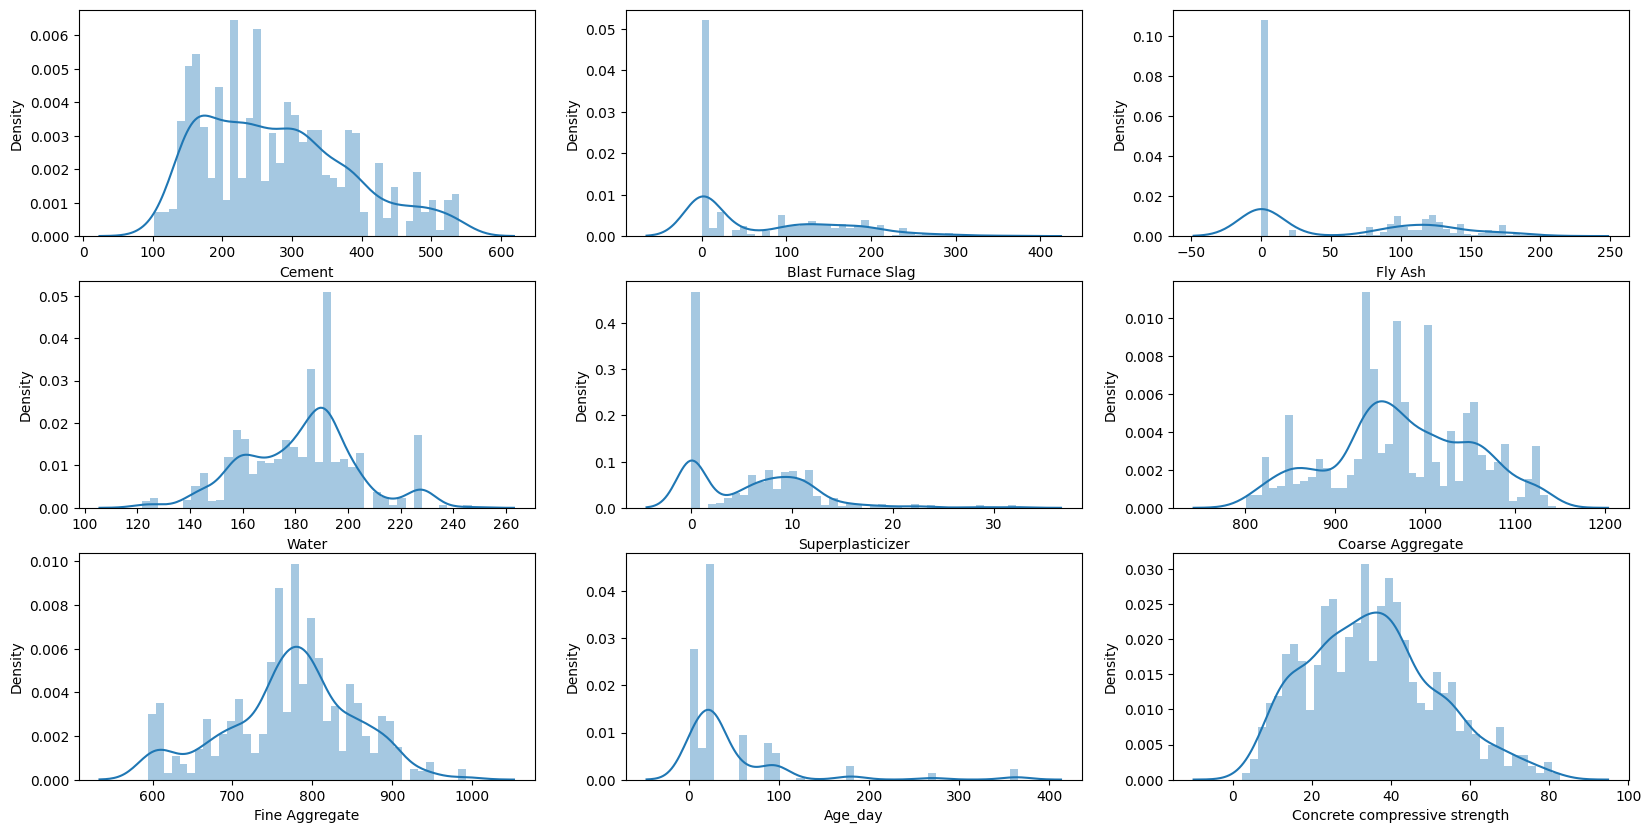

In [19]:
# cheek distribution of each column

plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], bins=40)

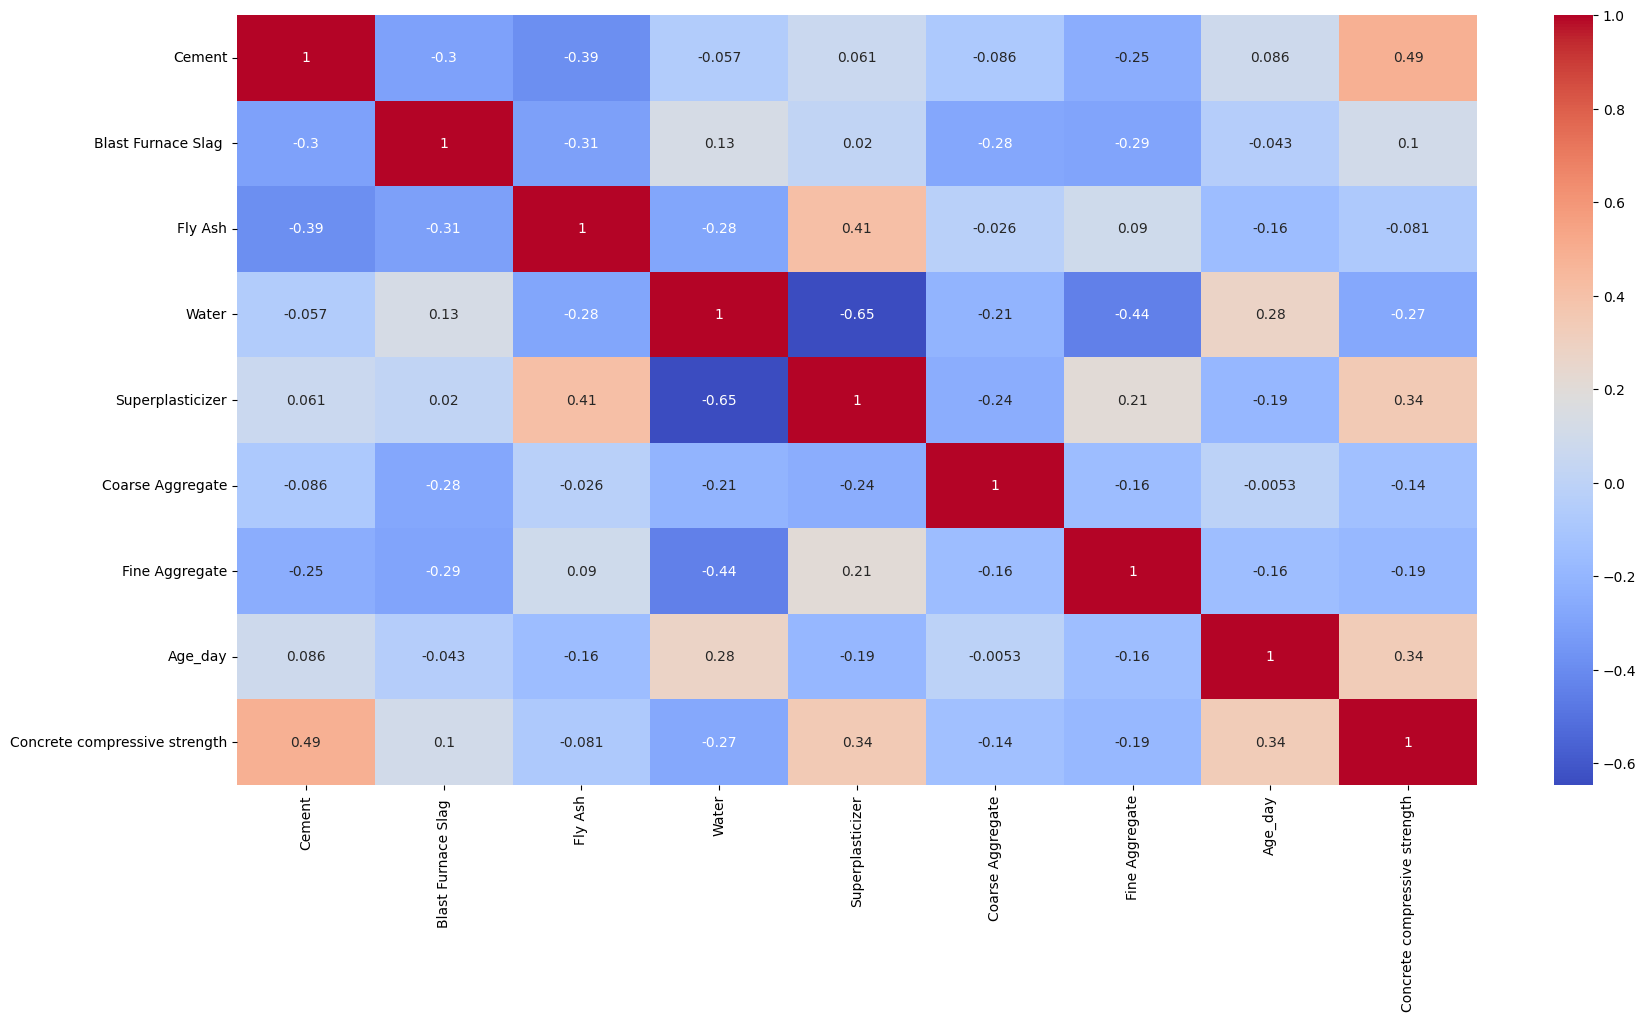

In [20]:
# cheek correlation between columns

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

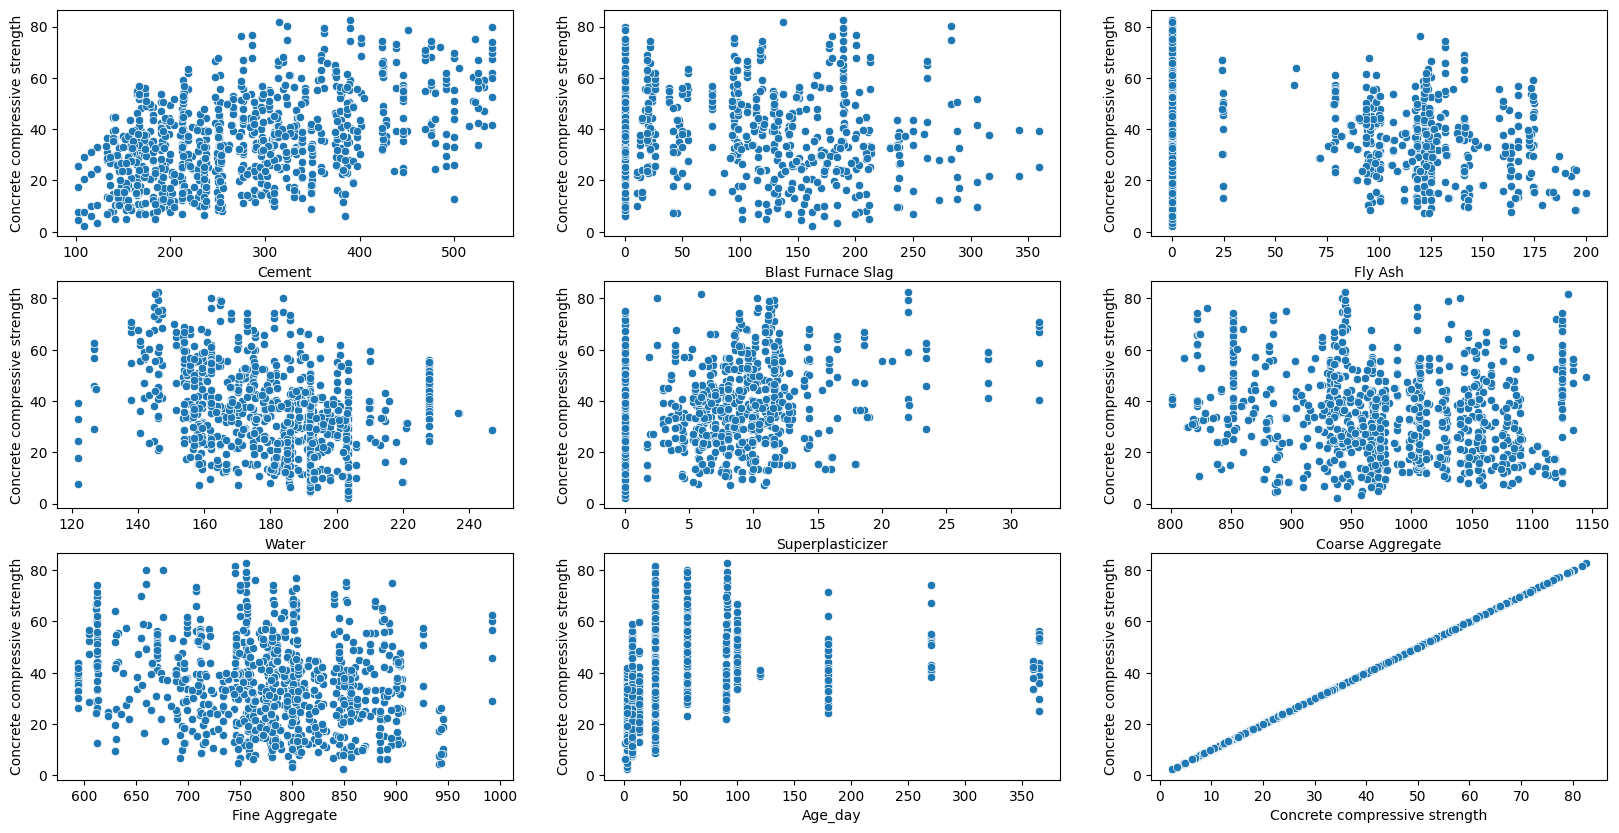

In [22]:
# cheek hetaerocedasticity

plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Concrete compressive strength'])

what is hetaroascedasticity?

Ans: Hetaoscedasticity is a condition in which the variance of the dependent variable is unequal across the range of values of the independent variable(s). The classic example of hetaroascedasticity is the plot of residual errors vs. predicted values. If the plot looks like a funnel, then heteroscedasticity is present.

In [24]:
# cheek multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df.drop('Concrete compressive strength', axis=1))
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])], index=X.columns)


const                  6623.408479
Cement                    7.448644
Blast Furnace Slag        7.262818
Fly Ash                   6.085350
Water                     6.839196
Superplasticizer          2.868713
Coarse Aggregate          4.957601
Fine Aggregate            6.972553
Age_day                   1.120104
dtype: float64

`conclusion for multicolinarity:` since the VIF values are less than 8, we can say that there is no multicollinearity in the data.

In [27]:
# creating feature and label

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
df['Concrete compressive strength'].unique()

array([79.98611076, 61.88736576, 40.26953526, 41.05277999, 44.2960751 ,
       47.02984744, 43.6982994 , 36.44776979, 45.85429086, 39.28978986,
       38.07424367, 28.02168359, 43.01296026, 42.32693164, 47.81378165,
       52.90831981, 39.35804798, 56.14196225, 40.56325203, 42.62064842,
       41.8367142 , 28.23748958,  8.06342182, 44.20782217, 52.51669744,
       53.30063166, 41.15137506, 52.1243856 , 37.42751518, 38.60376124,
       55.26012245, 41.71950328, 42.13112046, 53.69225402, 38.40795006,
       30.07976945, 37.72192144, 42.22902605, 36.2519586 , 50.45930106,
       38.99538361, 53.104131  , 41.54299743, 35.07640202, 15.04919265,
       40.75906322, 26.25800398, 32.82319446, 39.77931782, 46.93194184,
       33.11691123, 49.18514941, 14.58931216, 14.63826496, 41.9346198 ,
        9.13142014, 50.94882902, 33.01900564, 54.37828264, 51.73276323,
        9.86640156, 50.65511224, 48.69562145, 55.06431126, 44.6980396 ,
       30.27558064, 40.85696881, 71.98818916, 34.39795764, 28.79

In [32]:
# log transformation

for column in x.columns:
    x[column] += 1
    x[column] = np.log(x[column])

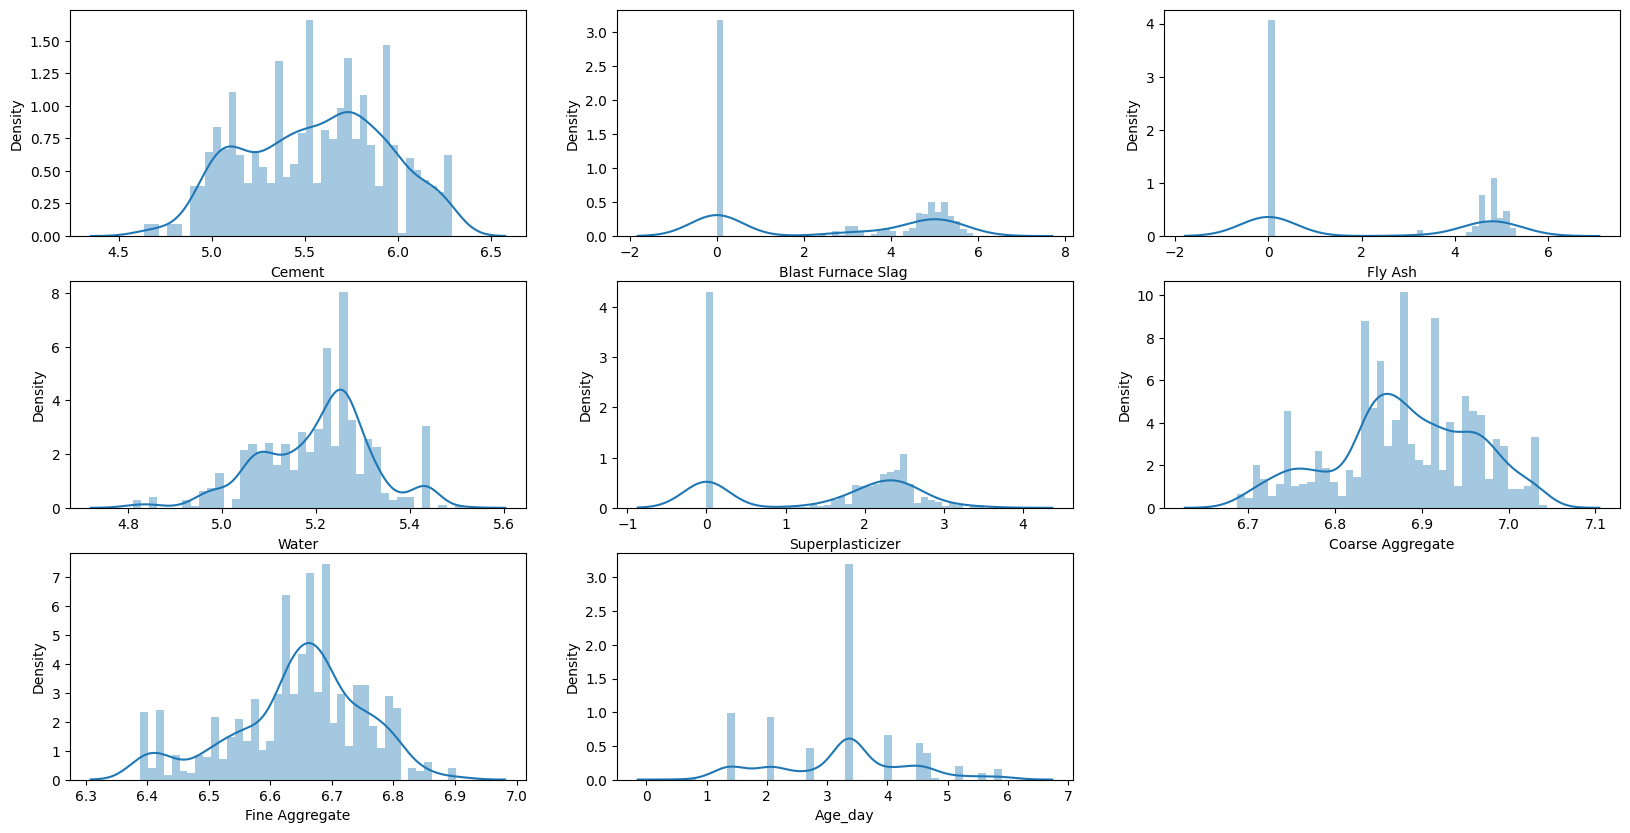

In [33]:
# cheek distribution of each column

plt.figure(figsize=(20, 10))
for i, col in enumerate(x.columns):
    plt.subplot(3, 3, i+1)
    sns.distplot(x[col], bins=40)

### Cement

The cement histogram has a narrow peak at around 5.0, which indicates that most of the cement particles have a similar size. The histogram also has a small tail at the lower end, which indicates that there are a few smaller particles present.

### Blast furnace slag

The blast furnace slag histogram is more spread out than the cement histogram, with a peak at around 6.0 and tails at both the lower and upper ends. This indicates that the blast furnace slag particles have a wider range of sizes.

### Fly ash

The fly ash histogram is similar to the blast furnace slag histogram, with a peak at around 6.5 and tails at both ends. However, the fly ash histogram is more skewed towards the lower end, which indicates that there are more smaller particles than larger particles.

### Water

The water histogram is a single peak at around 7.0, which indicates that the water is relatively uniform in terms of its composition.

### Superplasticizer

The superplasticizer histogram is also a single peak, but it is located at a lower value than the water histogram, at around 6.5. This indicates that the superplasticizer particles are smaller on average than the water molecules.

### Coarse aggregate

The coarse aggregate histogram has a peak at around 5.5, with a long tail extending to the right. This indicates that there is a wide range of particle sizes present in the coarse aggregate, with some particles being much larger than others.

### Fine aggregate

The fine aggregate histogram is similar to the coarse aggregate histogram, but the peak is located at a lower value, at around 4.5. This indicates that the fine aggregate particles are smaller on average than the coarse aggregate particles.

### Age day

The age day histogram is a single peak at around 7.0, which indicates that the data is relatively uniform in terms of its age.

Overall, the histograms in the image indicate that the different materials have a variety of different particle size distributions. The cement particles are relatively uniform in size, while the blast furnace slag and fly ash particles have a wider range of sizes. The water and superplasticizer particles are small, while the coarse and fine aggregate particles have a wider range of sizes. The data is relatively uniform in terms of its age.

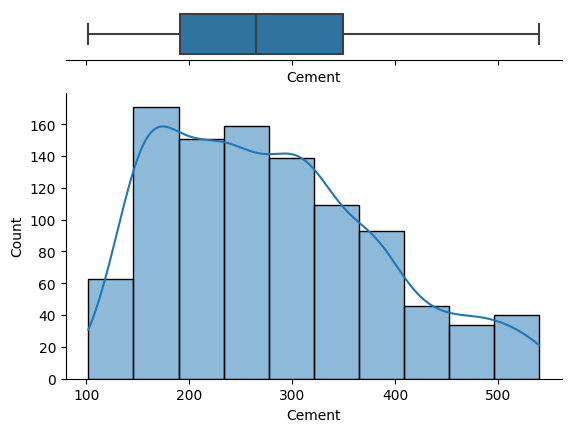

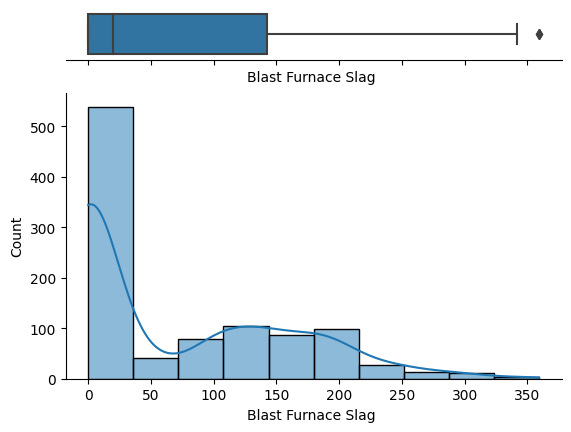

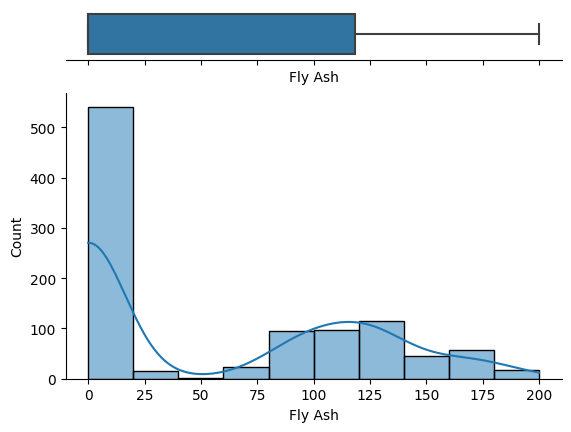

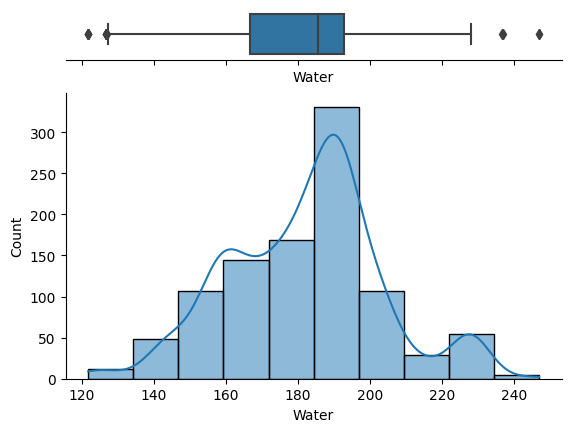

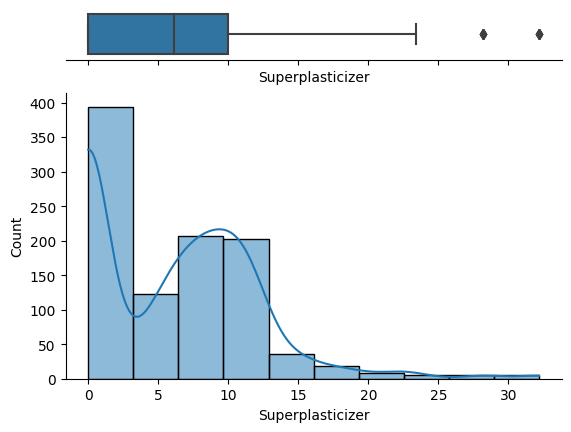

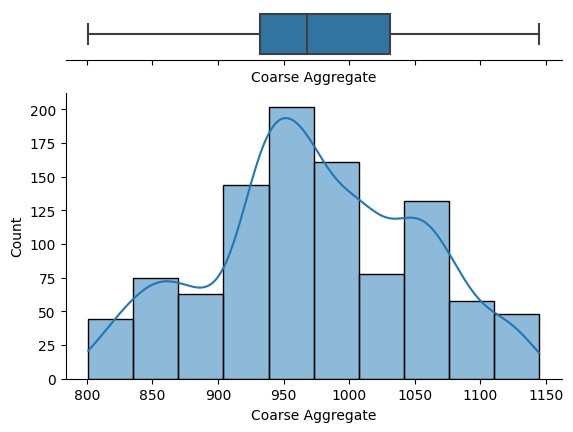

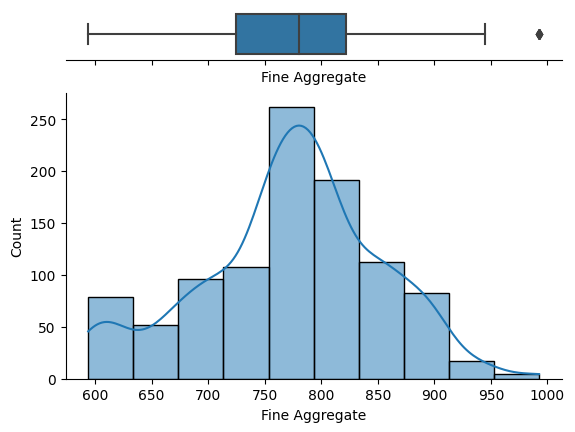

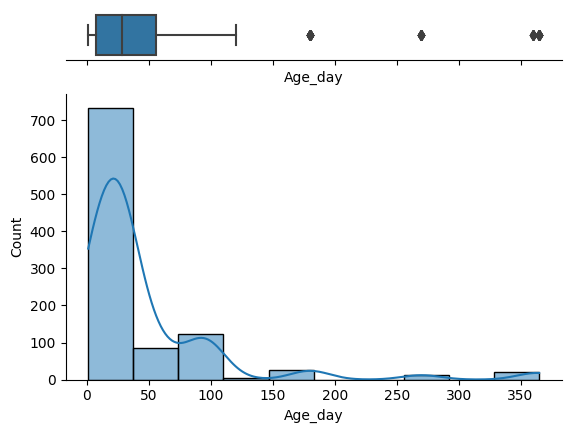

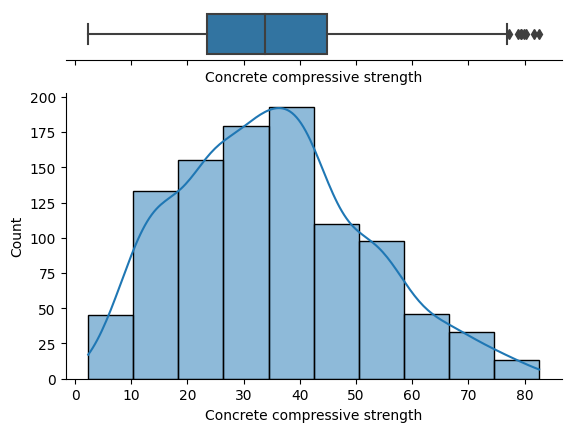

In [34]:

# We can vizualize the distributions of our variables

for column in df:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(x=df[column], bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [36]:
# cheek normality of each column using shapiro test

from scipy.stats import shapiro

for column in df.columns:
    stat, p = shapiro(df[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(column, 'looks Gaussian (fail to reject H0)')
    else:
        print(column, 'does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
Cement does not look Gaussian (reject H0)
Statistics=0.805, p=0.000
Blast Furnace Slag  does not look Gaussian (reject H0)
Statistics=0.769, p=0.000
Fly Ash does not look Gaussian (reject H0)
Statistics=0.980, p=0.000
Water does not look Gaussian (reject H0)
Statistics=0.859, p=0.000
Superplasticizer does not look Gaussian (reject H0)
Statistics=0.983, p=0.000
Coarse Aggregate does not look Gaussian (reject H0)
Statistics=0.981, p=0.000
Fine Aggregate does not look Gaussian (reject H0)
Statistics=0.588, p=0.000
Age_day does not look Gaussian (reject H0)
Statistics=0.982, p=0.000
Concrete compressive strength does not look Gaussian (reject H0)


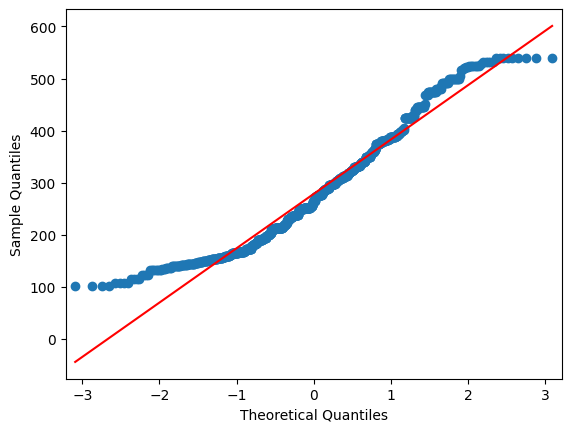

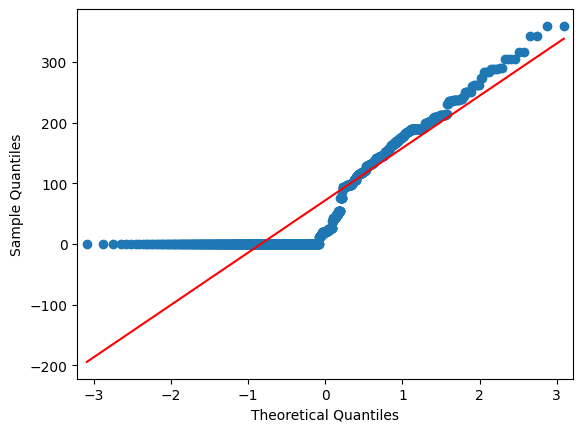

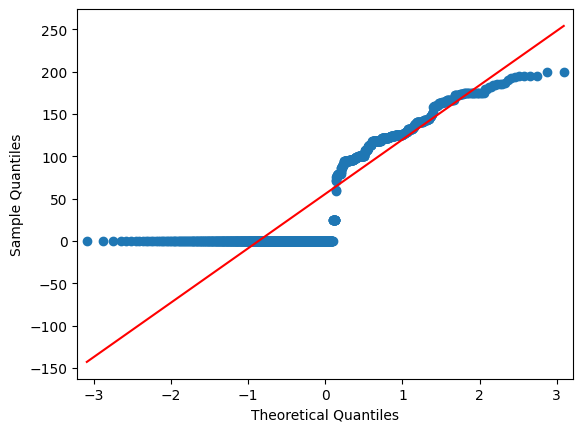

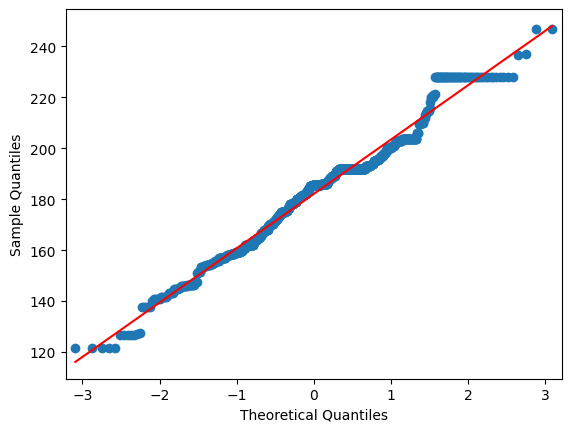

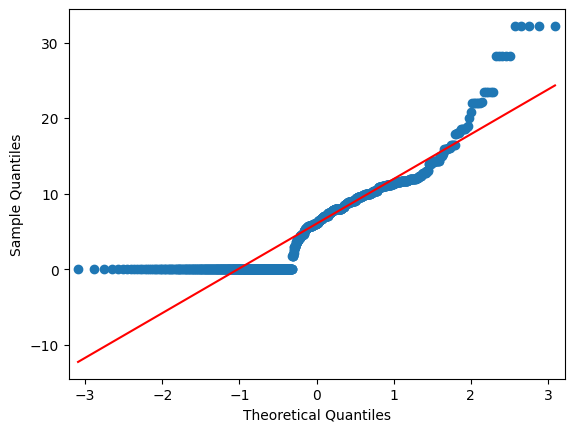

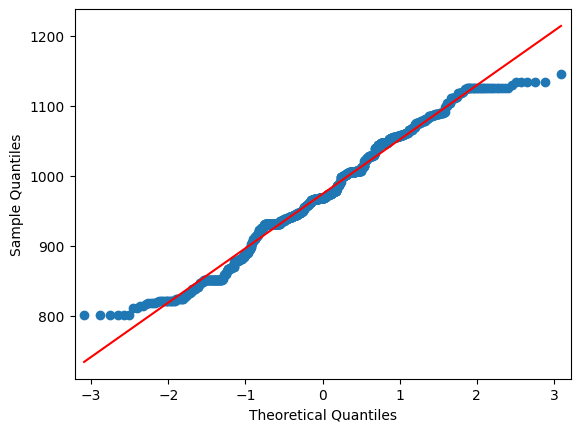

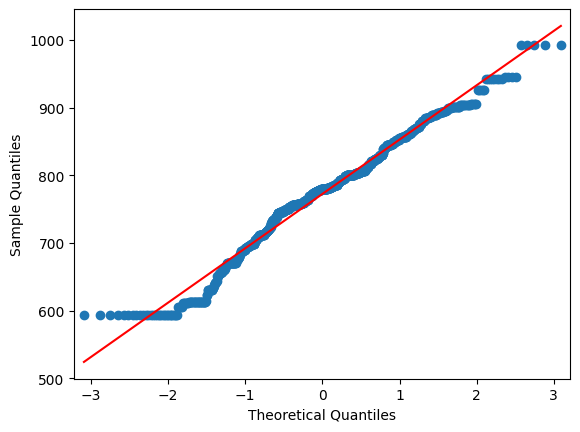

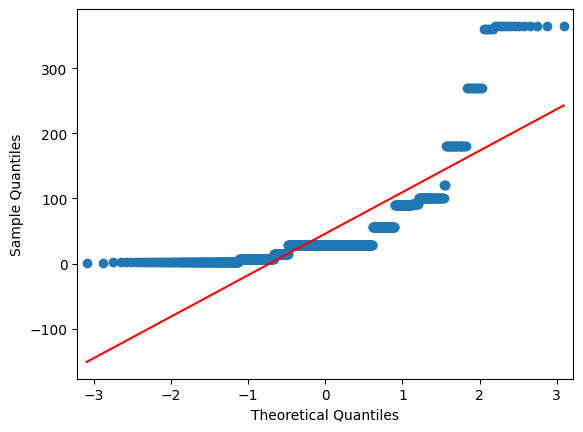

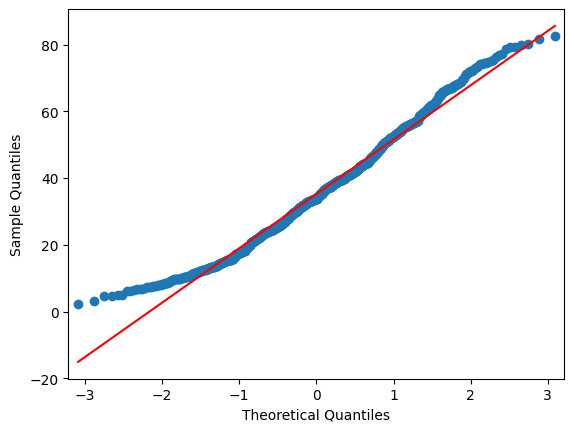

In [37]:
# plot QQ plot

from statsmodels.graphics.gofplots import qqplot

for column in df.columns:
    qqplot(df[column], line='s')
    plt.show()

In [38]:
# cheek skewness of each column

from scipy.stats import skew

for column in df.columns:
    print(column, skew(df[column]))

Cement 0.5641531966318768
Blast Furnace Slag  0.853969203588467
Fly Ash 0.4965810873823723
Water 0.03406778580598409
Superplasticizer 0.9801059955646362
Coarse Aggregate -0.06514479523518213
Fine Aggregate -0.2519459541485177
Age_day 3.2491150251898078
Concrete compressive strength 0.3950621693638031


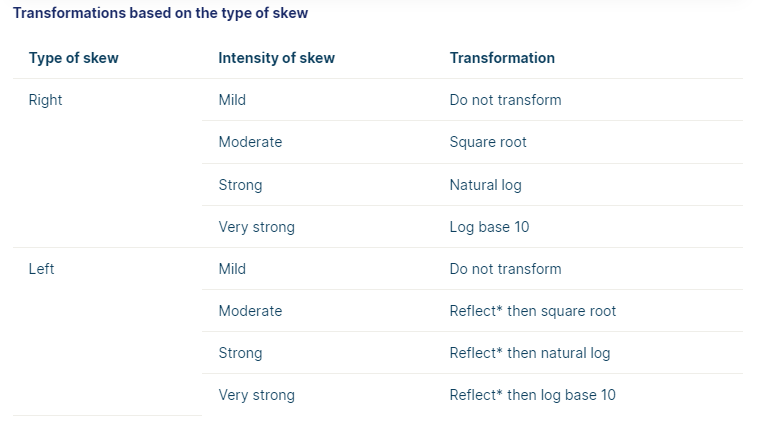

In [40]:
df.columns

Index(['Cement', 'Blast Furnace Slag ', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age_day',
       'Concrete compressive strength'],
      dtype='object')

In [43]:
# Let's look at a sorted list of each feature's pearson correlation with our target variable,strength
import scipy.stats
correlations = []
for col in df.columns.drop('Concrete compressive strength'):
    val = scipy.stats.pearsonr(df[col],df['Concrete compressive strength'])[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)
    
 

,Feature,Correlation with Strength
0,Cement,0.488283
4,Superplasticizer,0.344225
7,Age_day,0.337371
1,Blast Furnace Slag,0.103370
2,Fly Ash,-0.080648
5,Coarse Aggregate,-0.144710
6,Fine Aggregate,-0.186457
3,Water,-0.269606


# Machine learning Model Building

In [51]:
# Import the necessary tools
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [52]:
#Define inputs and targets
input_columns =df.columns.drop('Concrete compressive strength')
inputs = df[input_columns]
targets = df['Concrete compressive strength']

In [53]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=0)

In [55]:
#standard Scaling of numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Set up our K-Fold situation to have 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Getting a Baseline Score for Different Regression Models

Here, we will get a baseline score for a group of the most common regression models. Once we see which one performs best at a baseline, we can tune that model for optimal performance.

In [57]:
# Define a helper function to get a baseline score using K-fold cross validation for our models.
def ModelScoreWithCV(model):
    score = cross_val_score(model, X_train, y_train, cv= kf, scoring="r2")
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))


In [83]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]
for model in models:
    l = ModelScoreWithCV(model)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.5766
Baseline mean R-squared from K-fold CV of Ridge() is 0.5769
Baseline mean R-squared from K-fold CV of Lasso() is 0.531
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.7619
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.8836
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=No

## Hyperparameter Tuning

We again use K-fold Cross Validation to try different values for key hyperparameters for optimal performance as judged by an R-squared score.

In [59]:
# Define a helper function to use K-fold CV to test hyperparameters
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= kf, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

#### Optimizing n_estimators

In [60]:
estimators = [1,2,4,8,16,32,64,128,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is 0.3749
Mean R-squared from K-fold CV with {'n_estimators': 2} is 0.5972
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.7834
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8701
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8926
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.8994
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.9019
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9022
Mean R-squared from K-fold CV with {'n_estimators': 256} is 0.9019


### Optimizing max_depth

In [66]:
depths = [1, 2, 4, 8, 16]
for n in depths:
    TestXGBParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 1} is 0.8604
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 2} is 0.8925
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9069
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 8} is 0.8831
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 16} is 0.8696


### Optimizing Learning rate

In [73]:
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5]
for n in rate:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.0001} is 0.0129
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.001} is 0.146
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.01} is 0.7146
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.1} is 0.9048
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9057
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9069
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9046
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.8928


### Final Model

In [74]:
model = XGBRegressor(n_estimators = 128, max_depth = 4, learning_rate = 0.3, n_jobs=-1, random_state=23)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=128, n_jobs=-1,
             num_parallel_tree=None, random_state=23, ...)

### Using the Model to Make Predictions on our Test set
Now, the moment of truth. We put our model to use to predict the strengths in the test dataset and get some corresponding scores to see how well it performed.

In [75]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.9217264209800764
MSE: 20.742140865873893
RMSE: 4.554354055832055
MAE: 3.2656420006035574


## Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [76]:
# Create a dataframe showing the feature importances
importances = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
7,Age_day,0.265531
0,Cement,0.214803
4,Superplasticizer,0.152388
3,Water,0.123694
1,Blast Furnace Slag,0.106430
6,Fine Aggregate,0.075970
2,Fly Ash,0.040405
5,Coarse Aggregate,0.020780


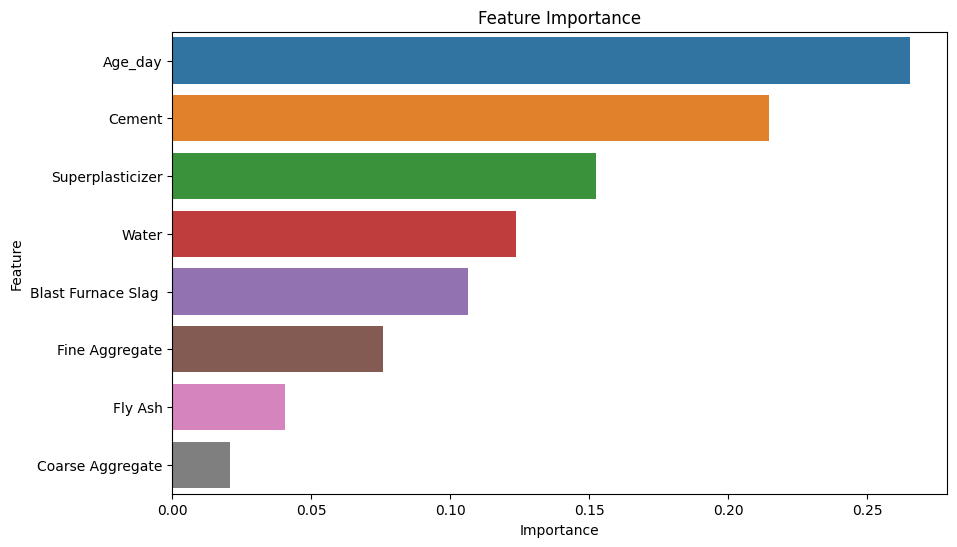

In [77]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

In [82]:
for i in df.columns:
    df.rename(columns={i: i.replace(' ', '_')}, inplace=True)

df.columns
df_to_csv = df.to_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\cement_strength_reg\\Data\\Concrete_Compressive_Strength.csv', index=False)